# ABSTRACT

Linear Model is the form of supervised learning, in which we feed the model/algorithm set of attributes called dependent variables and dependent variable which we need to predict. Initially, we provide independent and their corresponding dependent variable to train the model. The basic idea is to obtain best fit line along our datapoints and best fit line is which has minimumm sum of distance between datapoints to our regression line. 

Basic equation for linear model can be defined as Euclidean dot product between 2 vectors:
$$ f(x; w) = w^T x = \sum_{0}^{D} w_i x_i $$
where 'w' is the weight vector and 'x' is the input vector.

In this assignment, we will be discusing *Least Squares* and its model OLS. 

Logistic model (or logit model) is a widely used statistical model that, in its basic form, uses a logistic function to model a binary dependent variable; many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model.It describes the data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

###### Conclusion : 
We are learning about the techniques and algorithm performed on linear regression,logistic regression,ridge expression,step-wise regression,interaction effect and learned about the multi-colinearity.Like how to see the significance of the model,how well the data is normalised. 

In [4]:
# importing libraries

from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

The Data - contains the detailed information of my columns.

## THE DATA

cnt : count of total rental bikes including both casual and registered (Target - The dependent variable) 

Possible independent variables (predictors)               

casual: count of casual users                                                                                    
registered: count of registered users                                                                               
instant: record index                                                                                                 
season : season (1:springer, 2:summer, 3:fall, 4:winter)                                                             
yr : year (0: 2011, 1:2012)                                                                                         
mnth : month ( 1 to 12)                                                                                             
hr : hour (0 to 23)                                                                                               
holiday : weather day is holiday or not (extracted from [Web Link])                                               
weekday : day of the week                                                                                             
workingday : if day is neither weekend nor holiday is 1, otherwise is 0.                                           
weathersit :                                                                                                        
            1: Clear, Few clouds, Partly cloudy, Partly cloudy                                                       
            2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                         
            3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds              
            4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                         
temp : Normalized temperature in Celsius. 
       The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)                
atemp: Normalized feeling temperature in Celsius. 
       The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)               
hum: Normalized humidity. The values are divided to 100 (max)                                                     
windspeed: Normalized wind speed. The values are divided to 67 (max)

df stands for Data Frame.Below we are reading the csv.

In [5]:
# importing the dataset
df=pd.read_csv("hour.csv",sep=",")

df.head() by default will return us the first five values of the csv file as per the input provided by us.

In [41]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


df.describe() results in 3 kind of data : Numeric Data(Default) , Object Data and Categorical Data.                   
df.describe() by default will include the numeric data(count,min,max,mean,std,lower percentile(default = 25%), 50 percentile and upper percentile(default = 75%)) which is displayed in our Output below.

In [42]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


df.info() will print a concise summary of a DataFrame.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


The below output is displaying the number of null values of all the fields.                
We have used this function to check if there are any null values present in our dataset.

In [44]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

df.shape will tell us the number of rows and columns of our dataset.

In [45]:
df.shape

(17379, 17)

df.dtypes will tell us the datatypes of our predictors present in our dataset.

In [46]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

df.columns will display all the columns present in our dataset.

In [47]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

df.drop will remove the column. I removed dteday column as it was not predicting my target variable(cnt) so,it was not playing any role in my dataset.

In [48]:
df = df.drop(['dteday'], axis=1)

In [49]:
df.shape

(17379, 16)

df.corr() = It computes the pairwise correlation of columns, excluding NA/null values. 

In [50]:
corr = df.corr()
corr

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


Below I am sorting my calculated correlated values in Descending order in order to ease my analysis.

In [51]:
corr['cnt'].sort_values(ascending = False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

## Exploratory Data Analysis

plt.figure : will plot the figure with the provided figure size.                                                  
sns.heatmap : will plot the heatmap i.e. it will plot the correlated columns.                                     
annot= True : will display the values of correlation in the heatmap.
                                                                                                                     
I am plotting the heatmap to visualise the correlations between the columns which will help me to analyse the flow of the data while plotting different graphs                                                                                                                    


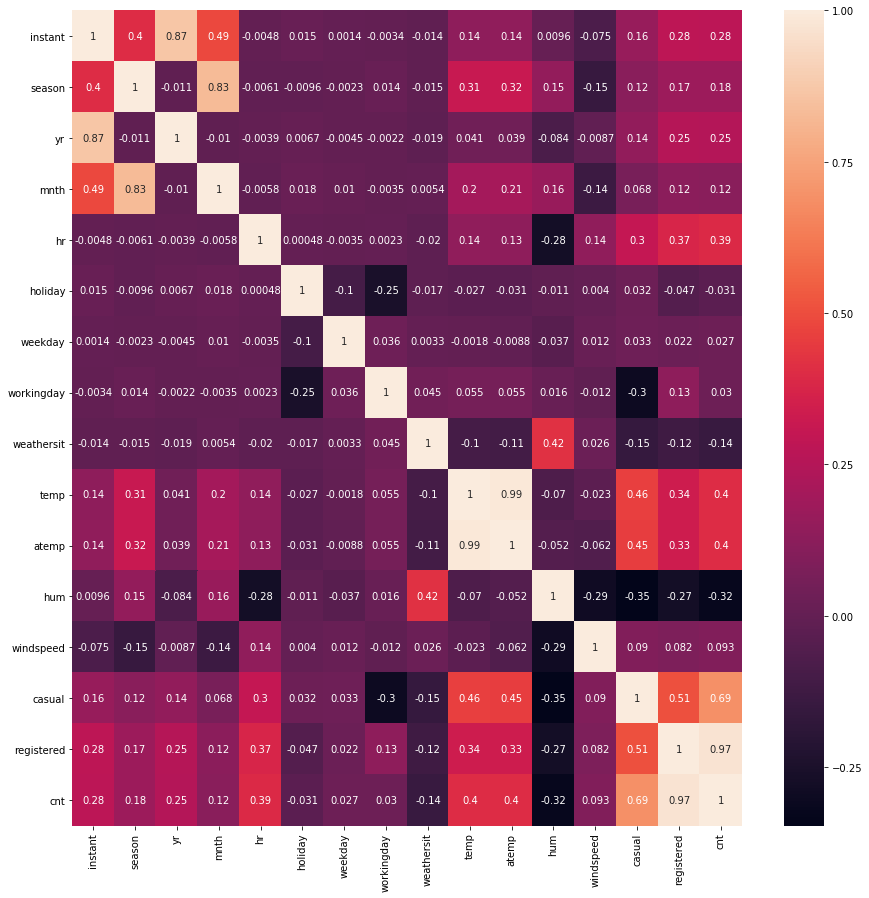

In [52]:
plt.figure(figsize = (15,15))
sns.heatmap(corr, annot= True)

I am plotting this bargraph to visualize the data between my target variable and the most uncorrelated column.

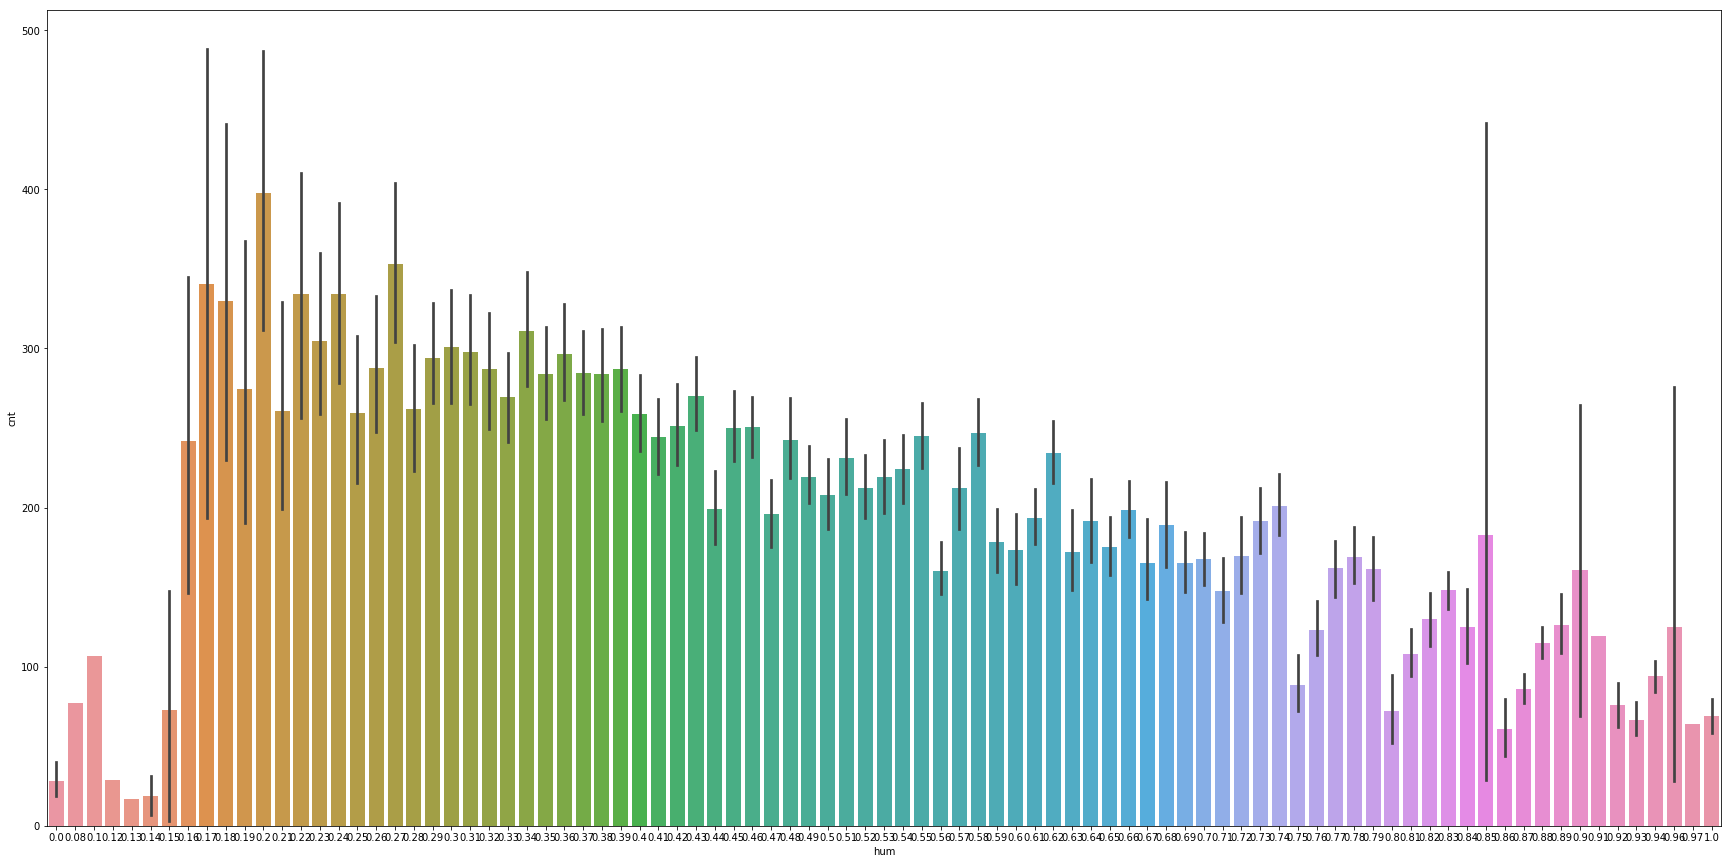

In [53]:
plt.figure(figsize = (30,15))
sns.barplot(data = df, x = 'hum', y = 'cnt')

I am plotting this bargraph to visualize the data between my target variable and the one of the correlated column.

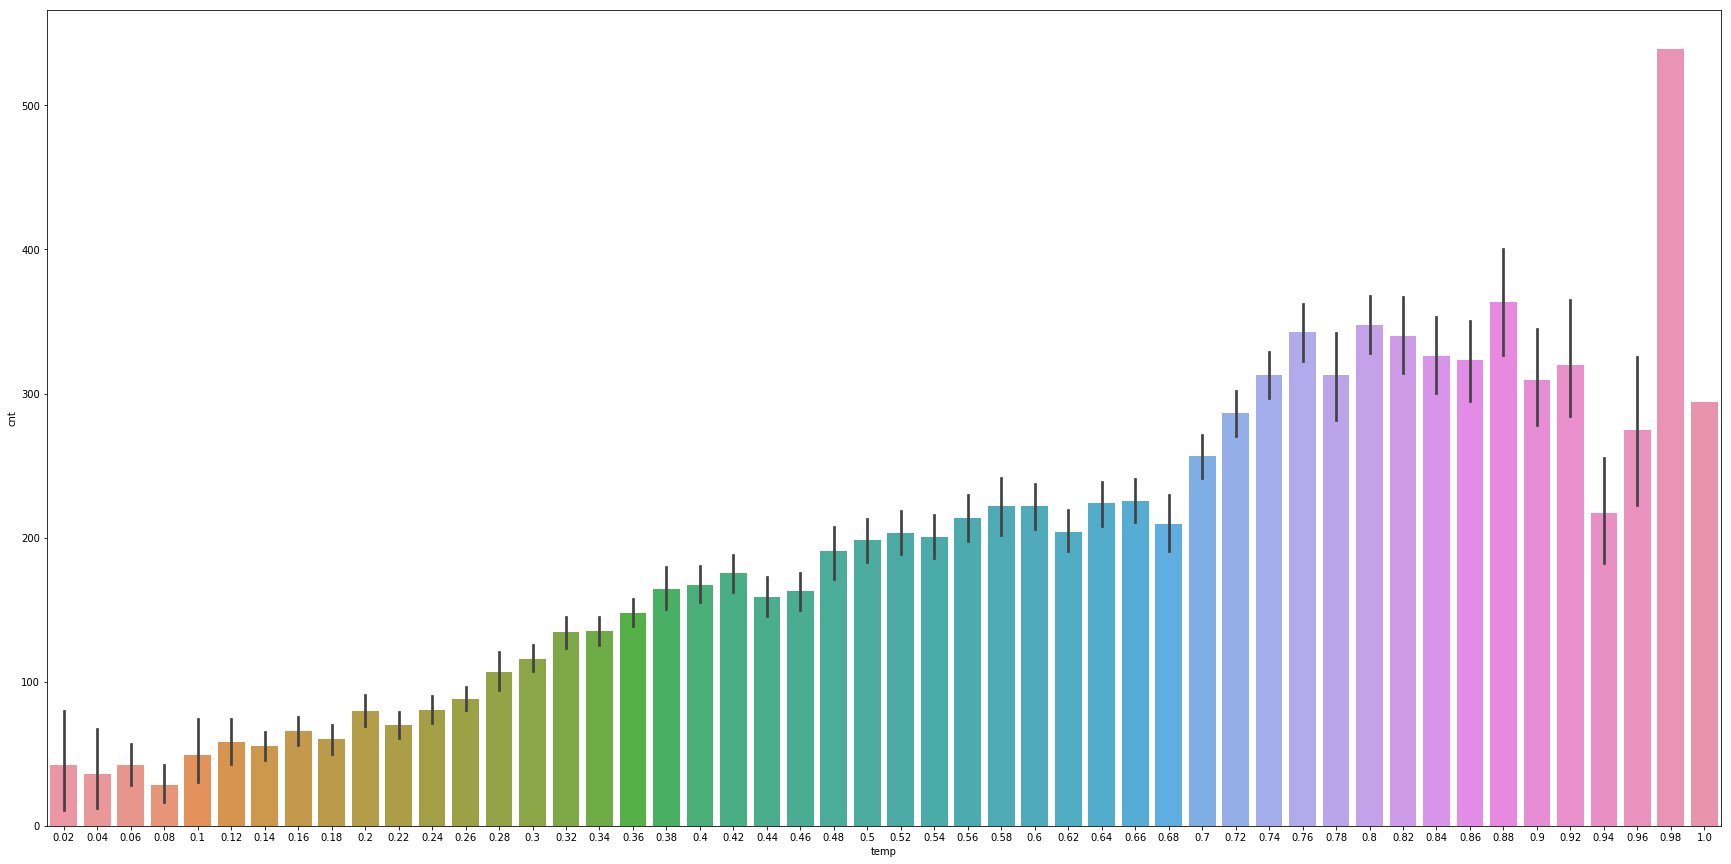

In [54]:
plt.figure(figsize = (30,15))
sns.barplot(data = df, x = 'temp', y = 'cnt')

I am plotting a scatter plot between my target variable and the most correlated column to check the flow of how many bikes have been registered.                                                                                          
df.iloc[:,15:16] = i am doing slicing to extract the columns registered and count from my excel to plot them.        
plt.show() = will plot the figure as y-axis as count(target variable) and x-axis as Registered(Predictor). 
                                                                                                                     
From the scatter plot i analysed that more the number of bikes are registered the count is increasing.They are directly propotional to each other.                                                                                                                     

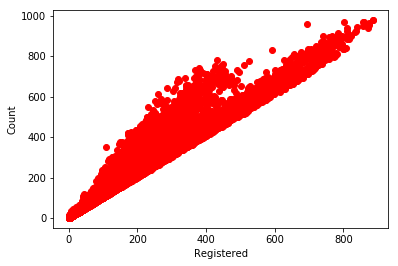

In [55]:
plt.scatter(df.iloc[:,14:15], df.iloc[:,15:16], c= 'red')
plt.xlabel("Registered")
plt.ylabel('Count')
plt.show()

I am plotting this bargraph to visualize the data between my target variable and one of the correlated column.

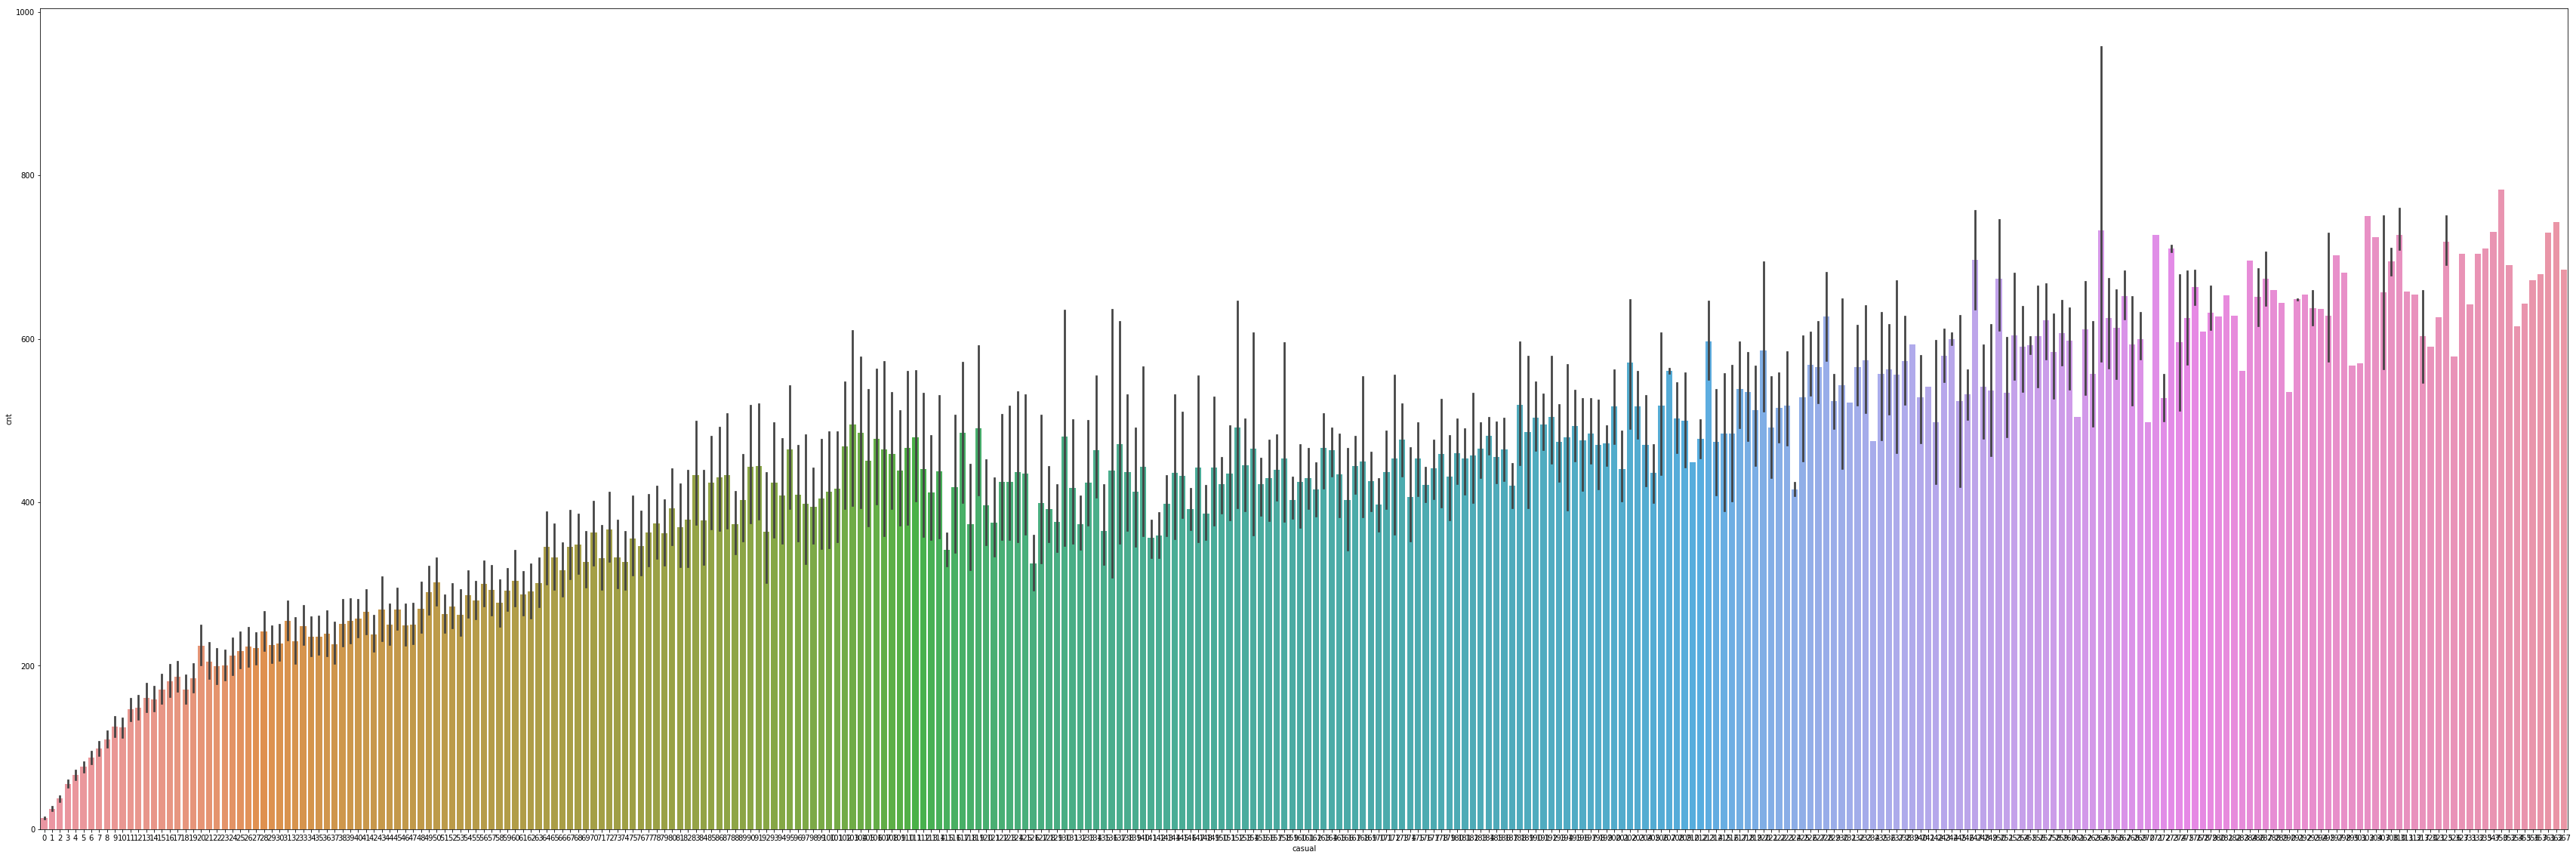

In [56]:
plt.figure(figsize = (60,20))
sns.barplot(data = df, x = 'casual', y = 'cnt')

I am just plotting the another graph as regplot between my target variable and the most correlated column to check the flow of how many bikes have been registered.From the regplot plot I analysed that more the count , the number of bikes are increasing.They are directly propotional to each other.     

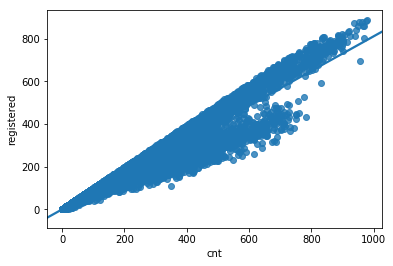

In [58]:
sns.regplot(y = 'registered', x = 'cnt', data= df )

I am just plotting the another regplot to visualize the data between my target variable and the one of the correlated column.From the regplot I analysed the trend that more the count , more is the temperature.But, mostly the data is scattered all over across the temperature and count following the trend.

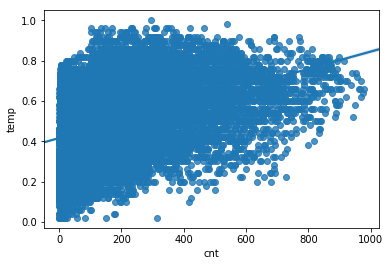

In [59]:
sns.regplot(x="cnt", y="temp", data=df)

I am just pairplotting all the columns to analyse the pair wise correlation between the columns to see the flow of linear regression.

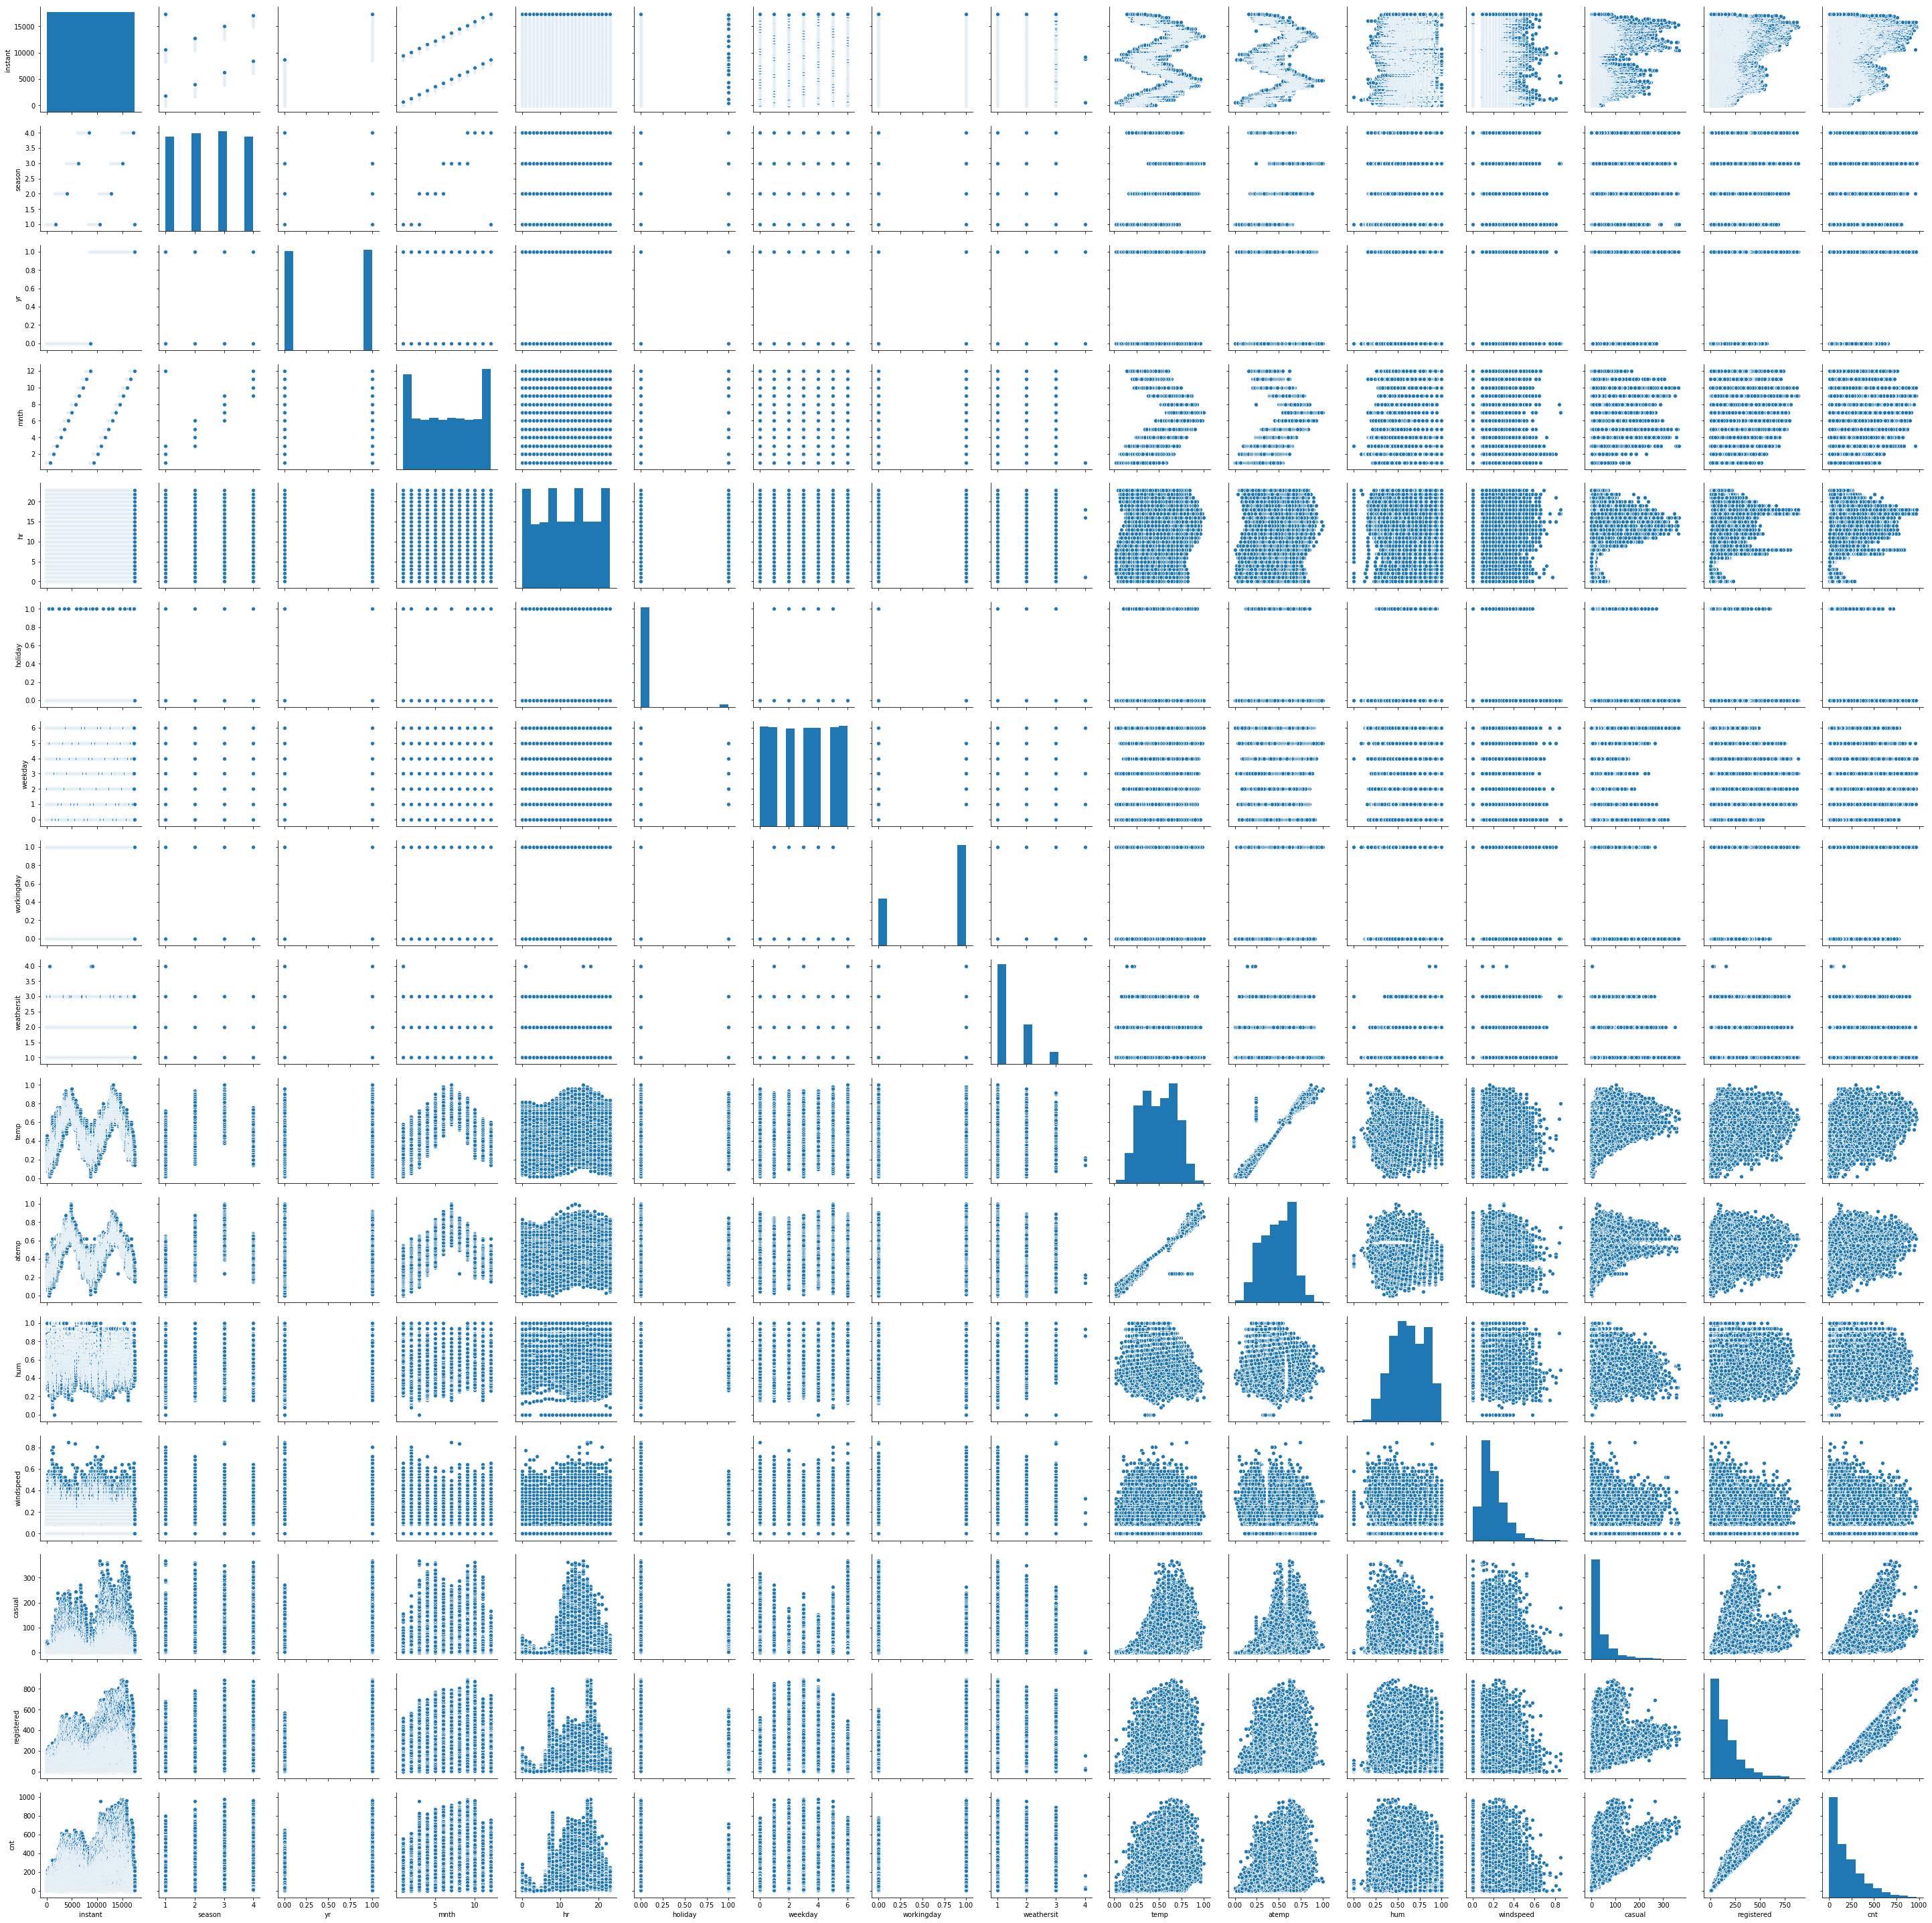

In [60]:
sns.pairplot(df)

I am plotting distplot of my target variable just to analyze the trend of my data and graph.From the plot i analysed that trend that the number of bikes count is highest at o.oo4 and count is increasing and reaching 1000

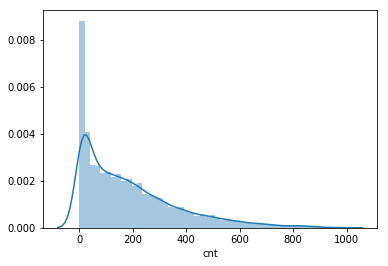

In [61]:
sns.distplot(df['cnt'])

I am plotting the graph between my most correlated columns as x-axis as casual and y-axis as registered and hue(subset) as my target variable count which is displayed on the right sight of the graph in the grid.From the graph I analyzed that it is plotting the regression lines as per the results.                                            
I added x_jitter to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. 


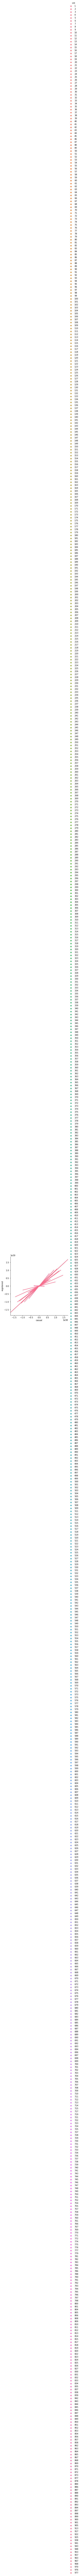

In [62]:
sns.lmplot(y= 'registered', x= 'casual', data= df , hue= "cnt", x_jitter=.05)

I am plotting the graph between my target variable and the correlated column as x-axis as casual and y-axis as count.  x_jitter = I added x_jitter to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear.                   
From the graph I analyzed that it is plotting the regression lines as per the results and the trend is that with the increase in casual count is also increasing and the plots are plotted across the regression line.     

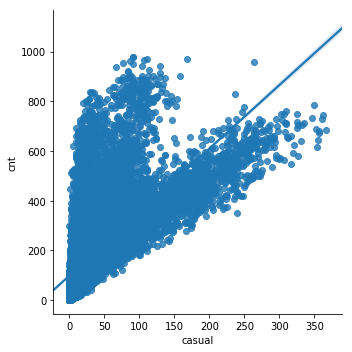

In [63]:
sns.lmplot(y= 'cnt', x= 'casual', data= df, x_jitter=.05)

# PART A : LINEAR REGRESSION

I am defining 3 different models having 5 independent variables and 1 dependent(target) variable to perform linear regression.

## 3 Models Defined for Linear Regression

In [24]:
model1=df[['season', 'hr', 'workingday', 'weekday', 'temp', 'cnt']]
model2=df[['mnth', 'hr', 'hum', 'weekday', 'casual', 'cnt']]
model3=df[['season', 'hr', 'weekday', 'casual', 'registered', 'cnt']]

For the linear regression, we are using OLS or Ordinary-Least-Square function because it provides us with the full blown statistical information about the estimation process. We would require AIC, BIC, RSquared to verify the results of the models for linear regression.

## OLS Model 1

We are using the model 1 to generate the regression summary to verify the metrices. 

In [25]:
model1 = ols("cnt ~ hr+workingday+weekday+temp+season-1", data= df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     6373.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:29:24   Log-Likelihood:            -1.1240e+05
No. Observations:               17379   AIC:                         2.248e+05
Df Residuals:                   17374   BIC:                         2.248e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hr             7.6729      0.161     47.510      0.000       7.356       7.989
workingday   -16.2021      2.410     -6.724      0.000     -20.925     -11.479
weekday       -2.6087      0.549     -4.754      0.000      -3.684      -1.533
temp         247.2307      5.938     41.638      0.000     235.592     258.869
season         1.6028      1.030      1.556      0.120      -0.416       3.621
==============================================================================
Omnibus:                     4440.569   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10151.225
Skew:                           1.453   Prob(JB):                         0.00
Kurtosis:                       5.360   Cond. No.                         70.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Verifying Assumptions for Model 1

##### Is relationship significant?

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect).               A low p-value (< 0.05) indicates that you can reject the null hypothesis. A model is said to be significant when the slope is zero β = 0(null hypothesis) or the p-value is zero.    

##### CONCLUSION                                                                                                                                                                                                     
In the output above, we can see that the predictor variables of hr,workingday,weekday and temp are significant because of their p-values are 0.000. However, the p-value for season (0.120) is greater than the common alpha level of 0.05, which indicates that it is not statistically significant.



# PART C - MULTI-COLINEARITY              

###### MULTI- COLINEARITY
Multicollinearity is a state of very high intercorrelations or inter-associations among the independent variables. It is therefore a type of disturbance in the data, and if present in the data the statistical inferences made about the data may not be reliable.

##### Tolerance Value:

Various recommendations for acceptable levels of tolerance have been discussed.Most commonly, a value of 0.10 or 0.20 is recommended as the minimum level of tolerance.As  VIF is reciprocal of Tolerance so they are interrelated and if the value of tolerance is less than 0.2 or 0.1 and, simultaneously, the value of VIF 10 and above, then the multicollinearity is present.                                                                                         
R-squared = Explained variation / Total variation


In [26]:
#Calculation of Tolerance: Tolerance measures the influence of one independent variable on all other independent 
#variables

Tolerance1=1-model1.rsquared
Tolerance1

0.3528381724945274

##### Variance Inflation Factor (VIF):
It is another method to determine the multicollinearity.                                                            The Variance Inflation Factor (VIF) measures the impact of collinearity among the variables in a regression model.It is always greater than or equal to 1. There is no formal VIF value for determining presence of multicollinearity. Values of VIF that exceed 10 are often regarded as indicating multicollinearity, but in weaker models values above 2.5 may be a cause for concern.

##### Conclusion                                                                                                                                                                                                                                 
In my model 1 there is no multi-colinearity present.

In [27]:
VIF1=(1/Tolerance1)
VIF1

2.8341604677580916

##### Q-Q (Quantile Quantile) plot to check multivariate normality
I generated a qq plot using the following code.QQ plot is used to check whether the data is distributed normally or not and a perfectly normal distribution would exactly follow a line with slope = 1 and intercept = 0.                
The theoretical quantiles are placed along the x-axis. That is, the x-axis is not your data, it is simply an expectation of where your data should have been, if it were normal and the actual data is plotted along the y-axis.   
0 is the Mean and the the values are the standard deviations from the mean.

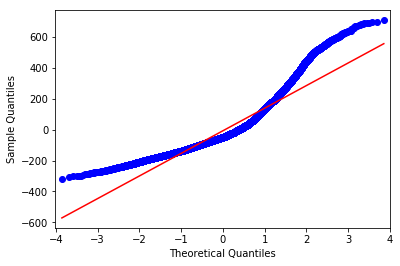

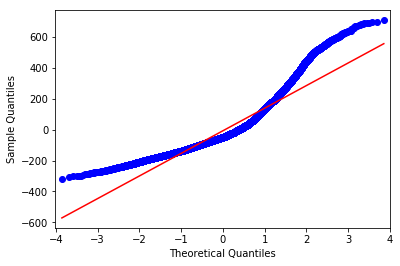

In [105]:
plot1= model1.resid
sm.qqplot(plot1,line='r')

## OLS Model 2 

We are using the model 2 to generate the regression summary to verify the metrices. 

In [31]:
model2 = ols("cnt ~ hr+mnth+weekday+casual+hum-1", data= df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                 1.185e+04
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:30:08   Log-Likelihood:            -1.0856e+05
No. Observations:               17379   AIC:                         2.171e+05
Df Residuals:                   17374   BIC:                         2.172e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hr             5.9537      0.130     45.915      0.000       5.700       6.208
mnth           5.7226      0.275     20.793      0.000       5.183       6.262
weekday        2.4433      0.447      5.462      0.000       1.567       3.320
casual         2.2929      0.021    111.389      0.000       2.253       2.333
hum          -13.4353      3.420     -3.929      0.000     -20.138      -6.732
==============================================================================
Omnibus:                     7203.865   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31248.558
Skew:                           2.043   Prob(JB):                         0.00
Kurtosis:                       8.144   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Verifying Assumptions for Model 2

##### Is relationship significant?

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect).               A low p-value (< 0.05) indicates that you can reject the null hypothesis. A model is said to be significant when the slope is zero β = 0(null hypothesis) or the p-value is zero.    

##### CONCLUSION                                                                                                                                                                                                     
In the output above, we can see that the all the p-vlaues for the predictor variables are 0.00.Hence, it s significant.

# PART C - MULTI-COLINEARITY

###### MULTI- COLINEARITY
Multicollinearity is a state of very high intercorrelations or inter-associations among the independent variables. It is therefore a type of disturbance in the data, and if present in the data the statistical inferences made about the data may not be reliable.

##### Tolerance Value:

Various recommendations for acceptable levels of tolerance have been discussed.Most commonly, a value of 0.10 or 0.20 is recommended as the minimum level of tolerance.As  VIF is reciprocal of Tolerance so they are interrelated and if the value of tolerance is less than 0.2 or 0.1 and, simultaneously, the value of VIF 10 and above, then the multicollinearity is present.                                                                                         
R-squared = Explained variation / Total variation

In [32]:
#Calculation of Tolerance: Tolerance measures the influence of one independent variable on all other independent 
#variables

Tolerance2=1-model2.rsquared
Tolerance2

0.2267477168185974

##### Variance Inflation Factor (VIF):
It is another method to determine the multicollinearity.                                                            The Variance Inflation Factor (VIF) measures the impact of collinearity among the variables in a regression model.It is always greater than or equal to 1. There is no formal VIF value for determining presence of multicollinearity. Values of VIF that exceed 10 are often regarded as indicating multicollinearity, but in weaker models values above 2.5 may be a cause for concern.

##### Conclusion                                                                                                                                                                                                                                 
In my model 2 there is no multi-colinearity present.

In [33]:
VIF2=(1/Tolerance2)
VIF2

4.41018773653196

##### Q-Q (Quantile Quantile) plot to check multivariate normality
I generated a qq plot using the following code.QQ plot is used to check whether the data is distributed normally or not and a perfectly normal distribution would exactly follow a line with slope = 1 and intercept = 0.                
The theoretical quantiles are placed along the x-axis. That is, the x-axis is not your data, it is simply an expectation of where your data should have been, if it were normal and the actual data is plotted along the y-axis.   
0 is the Mean and the the values are the standard deviations from the mean.

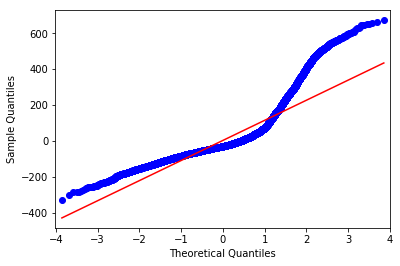

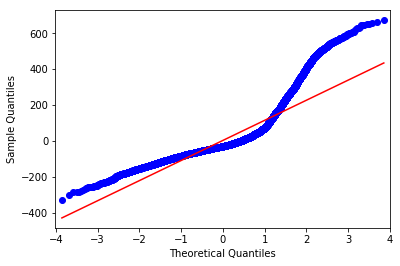

In [102]:
plot2= model2.resid
sm.qqplot(plot2,line='r')

## OLS Model 3

We are using the model 2 to generate the regression summary to verify the metrics. 

In [35]:
model3 = ols("weekday ~ hr+registered+season+casual+cnt-1", data= df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                weekday   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     6892.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:30:25   Log-Likelihood:                -38720.
No. Observations:               17379   AIC:                         7.745e+04
Df Residuals:                   17375   BIC:                         7.748e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hr             0.0778      0.002     33.818      0.000       0.073       0.082
registered    -0.0001      0.000     -0.647      0.518      -0.001       0.000
season         0.6804      0.010     65.077      0.000       0.660       0.701
casual         0.0005      0.000      1.625      0.104   -9.82e-05       0.001
cnt            0.0004      0.000      2.866      0.004       0.000       0.001
==============================================================================
Omnibus:                     1867.020   Durbin-Watson:                   0.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.680
Skew:                           0.005   Prob(JB):                    3.17e-114
Kurtosis:                       2.150   Cond. No.                     3.17e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Verifying Assumptions for Model 3

##### Is relationship significant?

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect).               A low p-value (< 0.05) indicates that you can reject the null hypothesis. A model is said to be significant when the slope is zero β = 0(null hypothesis) or the p-value is zero.    

##### CONCLUSION                                                                                                                                                                                                     
In the output above, we can see that the predictor variables of hrand season are significant because of their p-values are 0.000. However, the p-value for registered (0.518),casual(0.104) and cnt(0.004) is greater than the common alpha level of 0.05, which indicates that it is not statistically significant.




# PART C -  MULTI-COLINEARITY

##### Tolerance Value:

Various recommendations for acceptable levels of tolerance have been discussed.Most commonly, a value of 0.10 or 0.20 is recommended as the minimum level of tolerance.As  VIF is reciprocal of Tolerance so they are interrelated and if the value of tolerance is less than 0.2 or 0.1 and, simultaneously, the value of VIF 10 and above, then the multicollinearity is present.                                                                                         
R-squared = Explained variation / Total variation

In [36]:
#Calculation of Tolerance: Tolerance measures the influence of one independent variable on all other independent 
#variables

Tolerance3=1-model3.rsquared
Tolerance3

0.3866056391475434

##### Variance Inflation Factor (VIF):
It is another method to determine the multicollinearity.                                                            The Variance Inflation Factor (VIF) measures the impact of collinearity among the variables in a regression model.It is always greater than or equal to 1. There is no formal VIF value for determining presence of multicollinearity. Values of VIF that exceed 10 are often regarded as indicating multicollinearity, but in weaker models values above 2.5 may be a cause for concern.

##### Conclusion                                                                                                                                                                                                                                 
In my model 3 there is no multi-colinearity present.

In [37]:
VIF3=(1/Tolerance3)
VIF3

2.586615141478477

##### Q-Q (Quantile Quantile) plot to check multivariate normality
I generated a qq plot using the following code.QQ plot is used to check whether the data is distributed normally or not and a perfectly normal distribution would exactly follow a line with slope = 1 and intercept = 0.                
The theoretical quantiles are placed along the x-axis. That is, the x-axis is not your data, it is simply an expectation of where your data should have been, if it were normal and the actual data is plotted along the y-axis.   
0 is the Mean and the the values are the standard deviations from the mean.

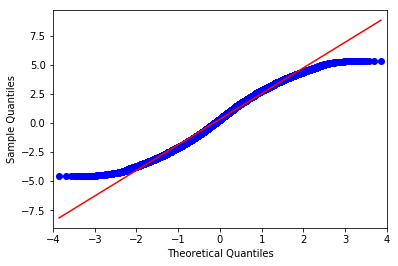

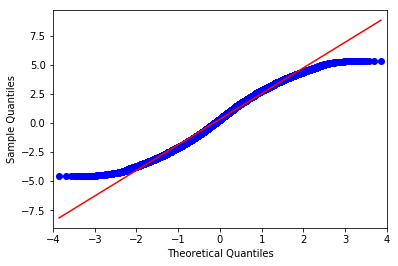

In [103]:
plot3= model3.resid
sm.qqplot(plot3,line='r')

   ### MULTI-COLINEARITY

##### Is there any multi-colinearity in the model?                                                                                                                               
No, in my all the above three models, there is no multi-colinearity present.    

##### In the multiple regression models are predictor variables independent of all the other predictor variables?             
Yes,in my model there are few predictor variables that are independent of the other predictor variables.

##### In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model. 
In my model the most significant predictors are casual, registered, 
 
##### Cross-validate the models. How well did they do?   
I cross validated the models and my models performed well.

## Comparing AIC , BIC , R-Squared for all models

AIC:  The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

BIC: The Bayesian information criterion (BIC) criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

R-squared (R2), which is the proportion of variation in the outcome that is explained by the predictor variables. In multiple regression models, R2 corresponds to the squared correlation between the observed outcome values and the predicted values by the model. The Higher the R-squared, the better the model.


<table style="width:50%">
  <tr>
      <th>Linear Regression<br></th>
    <th>AIC|BIC|R Squared</th> 
  </tr>
    <tr>
    <td>Model 1</td>
    <td>2.248e+05|2.248e+05|0.647</td> 
  </tr>
  <tr>
    <td>Model 2</td>
    <td>2.171e+05|2.172e+05|0.773</td> 
  </tr>
    <tr>
    <td>Model 3</td>
    <td>7.745e+04|7.748e+04|0.613</td> 
  </tr>
</table>

CONCLUSION: Lower the metrices AIC,BIC the better is the model and higher the R-Squared for the model,the better is the model. Above is the table concluded for the 3 different models as per their AIC,BIC,R-Squared.As per my analysation of the model I observed that second model the best fits for the linear regression.

## Cross-Validating the Models



### Fitting and Prediction of Model 1

We are defining two variables X which will contain all the oredictors taken in model 1 along with y as our target variable. 

In [97]:
X1 = df[['season', 'hr', 'workingday', 'weekday', 'temp']]
y1 = df[['cnt']]

Here we will train and test our data for our X (Predictors) and y(Target Variable)

In [98]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

linearModel_1.fit(X,y) creates a linear model of the responses y to a data matrix X. Here i am fetching all the results from my vector/target variable to the matrix of my predictors for the linear regression.

In [99]:
linearModel_1 = linear_model.LinearRegression()
model_1 = linearModel_1.fit(X1_train,y1_train)

I am calculating the score by fetching the training data and displaying the 5 results (cv=5) using function cross_val_score. I am doing this to generate the array of scores of the estimator for each run of the cross validation.

In [100]:
scores1 = cross_val_score(linearModel_1, X1_train, y1_train,cv=5, scoring='r2')
scores1

array([0.29600136, 0.27433138, 0.2970959 , 0.28136779, 0.28150813])

Checking the mean of all the scores of the trained data calculated above.

In [101]:
print('R squared: %2f' %(scores1.mean()))

R squared: 0.286061


Displaying all the predictions predicted from the linear model from the dataset.

In [15]:
predictions1 = linearModel_1.predict(X1_test)
print(predictions1)

[[147.10155527]
 [124.38188827]
 [264.79858803]
 ...
 [123.68069924]
 [ 50.0529459 ]
 [216.21657895]]


r2_score(coefficient of determination) is the regression score function.Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a r2_score of 0.0.                                                        So, i am checking this to check my prediction of the model.

In [16]:
valid1=r2_score(y1_test,predictions1)
valid1

0.2869422812137442

### Fitting and Prediction of Model 2

We are defining two variables X which will contain all the oredictors taken in model 1 along with y as our target variable. 

In [114]:
X2 = df[['mnth', 'hr', 'hum', 'weekday', 'casual']]
y2 = df[['cnt']]

Here we will train and test our data for our X (Predictors) and y(Target Variable)

In [115]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

linearModel_2.fit(X,y) creates a linear model of the responses y to a data matrix X. Here i am fetching all the results from my vector/target variable to the matrix of my predictors for the linear regression.

In [121]:
linearModel_2 = linear_model.LinearRegression()
model_2 = linearModel_2.fit(X2_train,y2_train)

I am calculating the score by fetching the training data and displaying the 5 results (cv=5) using function cross_val_score. I am doing this to generate the array of scores of the estimator for each run of the cross validation.

In [117]:
scores2 = cross_val_score(linearModel_2, X2_train, y2_train,scoring='r2',cv=5)
scores2

array([0.5307925 , 0.5415939 , 0.53268064, 0.52128357, 0.52942247])

Checking the mean of all the scores of the trained data calculated above.

In [118]:
print('R squared: %2f' %(scores2.mean()))

R squared: 0.531155


Displaying all the predictions predicted from the linear model from the dataset.

In [119]:
predictions2 = linearModel_2.predict(X2_test)
print(predictions2)

[[ 61.7933285 ]
 [ 73.95668794]
 [353.89643108]
 ...
 [ 80.19130954]
 [104.80361873]
 [207.244304  ]]


r2_score(coefficient of determination) is the regression score function.Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a r2_score of 0.0. So, i am checking this to check my prediction of the model.

In [120]:
valid2=r2_score(y2_test,predictions1)
valid2

0.2869422812137442

### Fitting and Prediction of Model 3 


We are defining two variables X which will contain all the oredictors taken in model 1 along with y as our target variable.

In [15]:
X3 = df[['season', 'hr', 'weekday', 'casual', 'registered']]
y3 = df[['cnt']]

Here we will train and test our data for our X (Predictors) and y(Target Variable)

In [123]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

linearModel_3.fit(X,y) creates a linear model of the responses y to a data matrix X. Here i am fetching all the results from my vector/target variable to the matrix of my predictors for the linear regression.

In [124]:
linearModel_3 = linear_model.LinearRegression()
model_3 = linearModel_3.fit(X3_train,y3_train)

I am calculating the score by fetching the training data and displaying the 5 results (cv=5) using function cross_val_score. I am doing this to generate the array of scores of the estimator for each run of the cross validation.

In [125]:
scores3 = cross_val_score(linearModel_3, X3_train, y3_train,scoring='r2',cv=5)
scores3

array([1., 1., 1., 1., 1.])

Checking the mean of all the scores of the trained data calculated above.

In [126]:
print('R squared: %2f' %(scores3.mean()))

R squared: 1.000000


Displaying all the predictions predicted from the linear model from the dataset.

In [127]:
predictions3 = linearModel_3.predict(X3_test)
print(predictions3)

[[  7.]
 [  5.]
 [743.]
 ...
 [ 34.]
 [  7.]
 [371.]]


r2_score(coefficient of determination) is the regression score function.Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a r2_score of 0.0. So, i am checking this to check my prediction of the model.

In [128]:
valid3=r2_score(y3_test,predictions3)
valid3

1.0

After fitting model, prediction and cross validation we are getting R square value in all three models around 0.7 and after cross validation value is dropping very significantly. So we can conclude that Linear Regression model may not be best for this data set. But we can try interaction effect on our model to check if the value of R square can improve or not. 

### LINEAR REGRESSION

##### Is the relationship significant?                                                                                                                                                                                        
As discussed above some predictors are significant and some are not.Like in Model 2 the relationship is significant as all the predictors are having p-value as 0.00 so as per my understanding model 2 is highly significant.

##### Are any model assumptions violated?     
Assumption 1 : Data is Linear   
Yes my data is linear and no assumptions are violated.                                                       
Assumption 2 : Data is normalized                                                                                  
With the help of QQ plot i checked the normality of the data in all the three models and the data in model 3 is somewhat normally ditributed but the data in model 1 and model 2 are not that distributed. 
Assumption 3 : Model is Significant
Yes, my assumptions is true as by checking the p-values of the models my model is coming out significantly.

##### Does the model make sense? Interpret the meaning of each independent variable.                                                                                       
Yes , my model make sense as i have chosed OLS and with the help of that i am able to check the different metrics which indeed is helping me to check the significance of the model.

##### Cross-validate the model. How well did it do?                                                                                                                                 
I created 3 different models with the different predictors and cross-validated all the models by dividing the data into training and test data and then cross verifying the R-squared and their cross-val score for the each model.

##### Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?  
Below is the comparison of AIC, BIC, adjusted R-squared as per my models.                     

<table style="width:50%">
  <tr>
      <th>Linear Regression<br></th>
    <th>AIC|BIC|Adjusted R-Squared</th> 
  </tr>
    <tr>
    <td>Model 1</td>
    <td>2.248e+05|2.248e+05|0.647</td> 
  </tr>
  <tr>
    <td>Model 2</td>
    <td>2.171e+05|2.172e+05|0.773</td> 
  </tr>
    <tr>
    <td>Model 3</td>
    <td>7.745e+04|7.748e+04|0.613</td> 
  </tr>
</table>




# PART C -  STEP-WISE REGRESSION                                                   
                                                                                                 
                                                                                                 
STEP-WISE Regression: It is an algorithm based on p-values of coefficients of linear regression

I am chosing one of the models from the linear regression and performing the step-wise regression. I am performing backward step-wise regression and in this the value of R-squared should be decrease as we iterate towards our next step.We are fitting the variables together and then removing the variables from the back as we are performing backward step-wise regression 

STEP 1 R-squared -      0.576                                                                         
STEP 1 Adj.R-squared -  0.576 

In [6]:
step1 = ols("cnt ~ yr+mnth+weekday+season+windspeed+workingday-1", data= df).fit()
step1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     3939.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:18:17   Log-Likelihood:            -1.1399e+05
No. Observations:               17379   AIC:                         2.280e+05
Df Residuals:                   17373   BIC:                         2.280e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr            93.7835      2.493     37.626      0.000      88.898      98.669
mnth          -4.2733      0.676     -6.318      0.000      -5.599      -2.947
weekday        3.0310      0.601      5.045      0.000       1.853       4.209
season        45.5192      1.977     23.026      0.000      41.644      49.394
windspeed    197.3452      9.303     21.212      0.000     179.109     215.581
workingday    13.1311      2.597      5.057      0.000       8.041      18.221
==============================================================================
Omnibus:                     2453.885   Durbin-Watson:                   0.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3745.177
Skew:                           1.015   Prob(JB):                         0.00
Kurtosis:                       4.024   Cond. No.                         60.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

STEP 2 R-squared -      0.576                                                                         
STEP 2 Adj.R-squared -  0.576 

In [147]:
step2 = ols("cnt ~ yr+mnth+weekday+season+windspeed-1", data= df).fit()
step2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     4715.
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:48:25   Log-Likelihood:            -1.1400e+05
No. Observations:               17379   AIC:                         2.280e+05
Df Residuals:                   17374   BIC:                         2.281e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr            95.1445      2.480     38.370      0.000      90.284     100.005
mnth          -4.3439      0.677     -6.419      0.000      -5.670      -3.017
weekday        3.6287      0.589      6.156      0.000       2.473       4.784
season        47.2886      1.947     24.288      0.000      43.472      51.105
windspeed    207.1541      9.105     22.751      0.000     189.307     225.002
==============================================================================
Omnibus:                     2439.558   Durbin-Watson:                   0.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3730.141
Skew:                           1.008   Prob(JB):                         0.00
Kurtosis:                       4.044   Cond. No.                         58.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

STEP 3 R-squared -      0.563                                                                         
STEP 3 Adj.R-squared -  0.563 

In [149]:
step3 = ols("cnt ~ yr+mnth+weekday+season-1", data= df).fit()
step3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     5598.
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:49:54   Log-Likelihood:            -1.1426e+05
No. Observations:               17379   AIC:                         2.285e+05
Df Residuals:                   17375   BIC:                         2.286e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr           105.1171      2.477     42.443      0.000     100.263     109.972
mnth          -4.5735      0.687     -6.661      0.000      -5.919      -3.228
weekday        7.5804      0.572     13.261      0.000       6.460       8.701
season        54.8576      1.947     28.180      0.000      51.042      58.673
==============================================================================
Omnibus:                     2047.109   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2930.843
Skew:                           0.905   Prob(JB):                         0.00
Kurtosis:                       3.879   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

STEP 4 R-squared -      0.543                                                                         
STEP 4 Adj.R-squared -  0.543 

In [150]:
step4 = ols("cnt ~ yr+mnth+weekday-1", data= df).fit()
step4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     6885.
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:50:13   Log-Likelihood:            -1.1464e+05
No. Observations:               17379   AIC:                         2.293e+05
Df Residuals:                   17376   BIC:                         2.293e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr           116.0112      2.501     46.377      0.000     111.108     120.914
mnth          13.0714      0.288     45.364      0.000      12.507      13.636
weekday       11.2415      0.569     19.748      0.000      10.126      12.357
==============================================================================
Omnibus:                     1800.030   Durbin-Watson:                   0.328
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2460.355
Skew:                           0.842   Prob(JB):                         0.00
Kurtosis:                       3.748   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

STEP 5 R-squared -      0.533                                                                         
STEP 5 Adj.R-squared -  0.533 

In [151]:
step5 = ols("cnt ~ yr+mnth-1", data= df).fit()
step5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     9911.
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:50:33   Log-Likelihood:            -1.1484e+05
No. Observations:               17379   AIC:                         2.297e+05
Df Residuals:                   17377   BIC:                         2.297e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr           127.9088      2.455     52.104      0.000     123.097     132.721
mnth          16.4193      0.236     69.694      0.000      15.958      16.881
==============================================================================
Omnibus:                     1424.038   Durbin-Watson:                   0.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1826.439
Skew:                           0.735   Prob(JB):                         0.00
Kurtosis:                       3.600   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

STEP 6 R-squared -      0.402                                                                         
STEP 6 Adj.R-squared -  0.402 

In [158]:
step6 = ols("cnt ~ yr-1", data= df).fit()
step6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                 1.170e+04
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:52:46   Log-Likelihood:            -1.1698e+05
No. Observations:               17379   AIC:                         2.340e+05
Df Residuals:                   17378   BIC:                         2.340e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr           234.6664      2.170    108.147      0.000     230.413     238.920
==============================================================================
Omnibus:                      543.084   Durbin-Watson:                   0.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              595.290
Skew:                           0.453   Prob(JB):                    5.43e-130
Kurtosis:                       3.008   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# PART D - INTERACTION EFFECT                                                     
                                                                                                             
Interaction effect is the way in which interaction variables can be multiplied with the pairwised correlated columns and add all of them and bind it to the data.                                                                    
We are creating a new Column IE and taking the correlted columns season and month                                                                                                                 



In [15]:
df['IE'] = df['season'] * df.mnth

In [16]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,IE
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,19.515795
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,15.381638
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,8.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,18.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,27.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,48.000000


I have chosed this model from the above linear regression model to view the interactions.

In [17]:
# Summary of Linear model for interaction effect
model3 = ols("weekday ~ hr+registered+season+casual+cnt+IE-1", data= df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                weekday   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     6518.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:01:43   Log-Likelihood:                -37799.
No. Observations:               17379   AIC:                         7.561e+04
Df Residuals:                   17374   BIC:                         7.565e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hr             0.0420      0.002     18.012      0.000       0.037       0.047
registered     0.0005      0.000      2.880      0.004       0.000       0.001
season         1.8253      0.028     65.642      0.000       1.771       1.880
casual        -0.0010      0.000     -3.430      0.001      -0.002      -0.000
cnt           -0.0004      0.000     -3.661      0.000      -0.001      -0.000
IE            -0.1117      0.003    -44.070      0.000      -0.117      -0.107
==============================================================================
Omnibus:                     3907.956   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              731.484
Skew:                           0.067   Prob(JB):                    1.45e-159
Kurtosis:                       2.004   Cond. No.                     3.17e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We are defining two variables X which will contain all the predictors taken in model 3 along with y as our target variable.I am taking the newly added column in my dependent variable to see the interactions.

In [18]:
X4 = df[['weekday','hr','registered', 'season', 'casual','IE']]
y4 = df[['cnt']]

Here we will train and test our data for our X (Predictors) and y(Target Variable)

In [19]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=0)

linearModel_4.fit(X,y) creates a linear model of the responses y to a data matrix X. Here i am fetching all the results from my vector/target variable to the matrix of my predictors for the linear regression.

In [20]:
linearModel_4 = linear_model.LinearRegression()
model_4 = linearModel_4.fit(X4_train,y4_train)

I am calculating the score by fetching the training data and displaying the 5 results (cv=5) using function cross_val_score. I am doing this to generate the array of scores of the estimator for each run of the cross validation.

In [21]:
scores4 = cross_val_score(linearModel_4, X4_train, y4_train,scoring='r2',cv=5)
scores4 

array([1., 1., 1., 1., 1.])

Checking the mean of all the scores of the trained data calculated above.

In [22]:
print('R squared: %2f' %(scores4.mean()))

R squared: 1.000000


Displaying all the predictions predicted from the linear model from the dataset.

In [23]:
predictions4 = linearModel_4.predict(X4_test)
print(predictions4)

[[  7.]
 [  5.]
 [743.]
 ...
 [ 34.]
 [  7.]
 [371.]]


r2_score(coefficient of determination) is the regression score function.Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a r2_score of 0.0. So, i am checking this to check my prediction of the model.

In [24]:
valid4=r2_score(y4_test,predictions4)
valid4

1.0

# PART B -  LOGISTIC REGRESSION

Importing library from LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression

Adding new column as in my dataset i dont have any binary column, so in order to perform the logistic regression i am adding a new column 'number_of_bikes' where i am dividing my data in two parts by taking the middle value 450 to check 0,1 as 0 = number of low bikes and 1 = number of high bikes.

In [24]:
df['number_of_bikes'] = np.where(df['cnt'] < 450, 0, 1)

Below I am checking that wheather my columns is added.

In [25]:
df.shape

(17379, 19)

## 3 Models defined for Logistic Regression

I am defining the 3 models for the logistic regression.

In [27]:
model_log1=df[['season', 'hr', 'workingday', 'weekday', 'temp', 'number_of_bikes']]
model_log2=df[['mnth', 'hr', 'hum', 'weekday', 'casual', 'number_of_bikes']]
model_log3=df[['season', 'hr', 'weekday', 'casual', 'registered', 'number_of_bikes']]

## Model 1

Below, I am defining two variables X_log1 ,ylog1. I am performing the slicing to fetch my columns from the excel.

In [28]:
X_log1 = model_log1.iloc[:,:-1]
y_log1 = model_log1.iloc[:,-1]

Here we will train and test our data for our X (Predictors) and y(Target Variable)

In [29]:
X_train_log1, X_test_log1, y_train_log1, y_test_log1 = train_test_split(X_log1, y_log1, test_size=0.2, random_state=0)

Below I am calculating the score of the training data and Test data.

In [37]:
logreg=LogisticRegression().fit(X_train_log1, y_train_log1)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train_log1, y_train_log1)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log1, y_test_log1)))

Training set score: 0.899
Test set score: 0.898


Below we are fitting the training data into the model and printing its summary.
From the results below let us observe the z value and p value and see which predictors are playing role.             
Z value should be >5.0 and p value should be <0.05                                                         
In our model1 the predictors season,hr,workinday and weekday affecting the logistic regression but not the temp(1.947) as it has value less than 5 are 

In [43]:
logit_model=sm.Logit(y_train_log1, X_train_log1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.367801
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               classify   No. Observations:                13903
Model:                          Logit   Df Residuals:                    13898
Method:                           MLE   Df Model:                            4
Date:                Tue, 19 Feb 2019   Pseudo R-squ.:                 -0.1272
Time:                        22:23:00   Log-Likelihood:                -5113.5
converged:                       True   LL-Null:                       -4536.5
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
season        -0.3882      0.025    -15.270      0.000      -0.438      -0.338
hr            -0.0145      0.

### Cross-validating the model

Logistic Regression does the binary predictions or probability predictions on the interval [0, 1] with a threshold probability to determine where we split between 0 and 1. The ROC curve or "receiver operating characteristic" curve is an evaluation method we can use to assess the efficacy of a binary classification algorithm ("Receiver Operating Characteristic", n.d.) as well as choose the optimal threshold based on our tolerance for false negatives and desire for true positives.
Below we are calculating the AUC for the model and in order to calculate that, we are using ROC curve which is simply a plot of the values of sensitivity against one minus specificity, as the value of the cut-point c is increased from 0 through to 1.                                                              
Model with high discrimination ability will have high sensitivity and specificity simultaneously, leading to an ROC curve which goes close to the top left corner of the plot.Model with no discrimination ability will have an ROC curve which is the 45 degree diagonal line. 

    
ROC curve will plot the two parameters True Positive Rate, False Positive Rate.
So, below we are plotting the ROC curve to check  the discrimination ability of our curve.We are plotting the False Positive values along x-axis and True Positive values along y-axis and for the value of cutoff we will calculete using np.argmin which will return us the indices of the minimum values along an axis.                                                                              

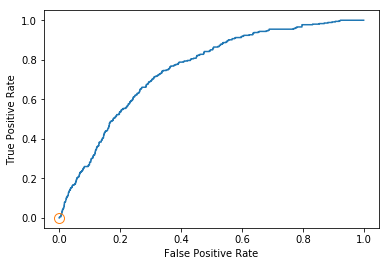

In [44]:
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y_test_log1,logreg.decision_function(X_test_log1))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

AUC is the probability that if you were to take a random pair of observations, one with Y=1 and one with Y=0, the observation with Y=1 has a higher predicted probability than the other. The AUC thus gives the probability that the model correctly ranks such pairs of observations.                                                                   
AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
So, I am calculating the AUC of all the models and at the end i will conclude.

In [45]:
from sklearn import metrics
metrics.auc(falsepos, truepos)

0.752792285113483

## Model 2

Below, I am defining two variables X_log2 ,ylog2. I am performing the slicing to fetch my columns from the excel.

In [60]:
X_log2 = model_log2.iloc[:,:-1]
y_log2 = model_log2.iloc[:,-1]

Here we will train and test our data for our X (Predictors) and y(Target Variable)

In [61]:
X_train_log2, X_test_log2, y_train_log2, y_test_log2 = train_test_split(X_log2, y_log2, test_size=0.2, random_state=0)

Below I am calculating the score of the training data and Test data.

In [62]:
logreg=LogisticRegression().fit(X_train_log2, y_train_log2)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train_log2, y_train_log2)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log2, y_test_log2)))

Training set score: 0.916
Test set score: 0.917


Below we are fitting the training data into the model and printing its summary.
From the results below let us observe the z value and p value and see which predictors are playing role.             
Z value should be >5.0 and p value should be <0.05                                                         
In our model2 the predictors hr,hum,weekdday and casual but not mnth as its z value is 0.372 which is less than 5 are affecting the logistic regression.

In [64]:
logit_model=sm.Logit(y_train_log2, X_train_log2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.261400
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        number_of_bikes   No. Observations:                13903
Model:                          Logit   Df Residuals:                    13898
Method:                           MLE   Df Model:                            4
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.1989
Time:                        19:17:18   Log-Likelihood:                -3634.2
converged:                       True   LL-Null:                       -4536.5
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mnth           0.0037      0.010      0.372      0.710      -0.016       0.023
hr            -0.0362      0.

### Cross-validating the model

Logistic Regression does the binary predictions or probability predictions on the interval [0, 1] with a threshold probability to determine where we split between 0 and 1. The ROC curve or "receiver operating characteristic" curve is an evaluation method we can use to assess the efficacy of a binary classification algorithm ("Receiver Operating Characteristic", n.d.) as well as choose the optimal threshold based on our tolerance for false negatives and desire for true positives.
Below we are calculating the AUC for the model and in order to calculate that, we are using ROC curve which is simply a plot of the values of sensitivity against one minus specificity, as the value of the cut-point c is increased from 0 through to 1.                                                              
Model with high discrimination ability will have high sensitivity and specificity simultaneously, leading to an ROC curve which goes close to the top left corner of the plot.Model with no discrimination ability will have an ROC curve which is the 45 degree diagonal line. 

ROC curve will plot the two parameters True Positive Rate, False Positive Rate. So, below we are plotting the ROC curve to check the discrimination ability of our curve.We are plotting the False Positive values along x-axis and True Positive values along y-axis and for the value of cutoff we will calculete using np.argmin which will return us the indices of the minimum values along an axis.

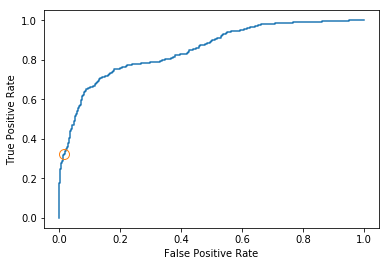

In [51]:
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y_test_log2,logreg.decision_function(X_test_log2))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

AUC is the probability that if you were to take a random pair of observations, one with Y=1 and one with Y=0, the observation with Y=1 has a higher predicted probability than the other. The AUC thus gives the probability that the model correctly ranks such pairs of observations.
AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0. So, I am calculating the AUC of all the models and at the end i will conclude.

In [52]:
from sklearn import metrics
metrics.auc(falsepos, truepos)

0.8504209238609178

## Model 3

Below, I am defining two variables X_log3 ,ylog3. I am performing the slicing to fetch my columns from the excel.

In [52]:
X_log3 = model_log3.iloc[:,:-1]
y_log3 = model_log3.iloc[:,-1]

Here we will train and test our data for our X (Predictors) and y(Target Variable)

In [53]:
X_train_log3, X_test_log3, y_train_log3, y_test_log3 = train_test_split(X_log3, y_log3, test_size=0.2, random_state=0)

Below I am calculating the score of the training data and Test data.

In [54]:
logreg=LogisticRegression().fit(X_train_log3, y_train_log3)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train_log3, y_train_log3)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log3, y_test_log3)))

Training set score: 0.995
Test set score: 0.996


Below we are fitting the training data into the model and printing its summary.
From the results below let us observe the z value and p value and see which predictors are playing role.             
Z value should be >5.0 and p value should be <0.05                                                         
In our model3 the all the predictors are affecting the logistic regression.

In [55]:
logit_model=sm.Logit(y_train_log3, X_train_log3)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.117077
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:        number_of_bikes   No. Observations:                13903
Model:                          Logit   Df Residuals:                    13898
Method:                           MLE   Df Model:                            4
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.6412
Time:                        19:13:32   Log-Likelihood:                -1627.7
converged:                       True   LL-Null:                       -4536.5
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
season        -1.6278      0.050    -32.561      0.000      -1.726      -1.530
hr            -0.3602      0.

### Cross-validating the model

Logistic Regression does the binary predictions or probability predictions on the interval [0, 1] with a threshold probability to determine where we split between 0 and 1. The ROC curve or "receiver operating characteristic" curve is an evaluation method we can use to assess the efficacy of a binary classification algorithm ("Receiver Operating Characteristic", n.d.) as well as choose the optimal threshold based on our tolerance for false negatives and desire for true positives. Below we are calculating the AUC for the model and in order to calculate that, we are using ROC curve which is simply a plot of the values of sensitivity against one minus specificity, as the value of the cut-point c is increased from 0 through to 1.
Model with high discrimination ability will have high sensitivity and specificity simultaneously, leading to an ROC curve which goes close to the top left corner of the plot.Model with no discrimination ability will have an ROC curve which is the 45 degree diagonal line.

ROC curve will plot the two parameters True Positive Rate, False Positive Rate. So, below we are plotting the ROC curve to check the discrimination ability of our curve.We are plotting the False Positive values along x-axis and True Positive values along y-axis and for the value of cutoff we will calculete using np.argmin which will return us the indices of the minimum values along an axis.

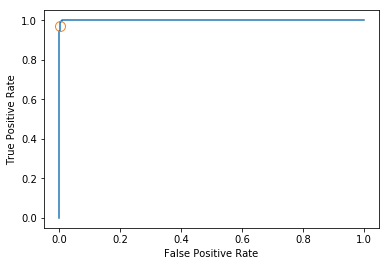

In [57]:
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y_test_log3,logreg.decision_function(X_test_log3))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

AUC is the probability that if you were to take a random pair of observations, one with Y=1 and one with Y=0, the observation with Y=1 has a higher predicted probability than the other. The AUC thus gives the probability that the model correctly ranks such pairs of observations.
AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0. So, I am calculating the AUC of all the models and at the end i will conclude.

In [58]:
from sklearn import metrics
metrics.auc(falsepos, truepos)

0.9998651813085195

<table style="width:50%">
  <tr>
      <th>Logistic Regression<br>(Classification Model)<br></th>
    <th>AUC</th> 
  </tr>
    <tr>
    <td>Model 1</td>
    <td>0.7527</td> 
  </tr>
  <tr>
    <td>Model 2</td>
    <td>0.8504</td> 
  </tr>
    <tr>
    <td>Model 3</td>
    <td>0.9998</td> 
  </tr>
</table>



##### CONCLUSION
By observing all the z value and p value of the models and calculating the AUC of all the models i am coming to the conclusion that my Model3 is best fit for logistic regression.


#####  Is the relationship significant?
As per my visualization as per the p-value in the logistic regression my model 3 is highly significant as all the predictors are having p value a 0.00 which is less than 0.05

#####  Are any model assumptions violated?      
Assumption 1 : There will be no linear relationship between the dependent and independent variables.        
Assumption 2 : Error terms (residuals) do not need to be normally distributed.                                
Assumption 3 : Observations should be independent of each other.                                                     
None of my assumptions are violated

#####  Does the model make sense?  Interpret the meaning of each independent variable.  
Yes, my model make sense and each independent variable has there own meaning.

#####  Cross-validate the model. How well did it do? 
I cross validated the model using ROC curve and calculating the values of AUC for each model.Below is the table to demonstrate the values for the AUC.
<table style="width:50%">
  <tr>
      <th>Logistic Regression<br>(Classification Model)<br></th>
    <th>AUC</th> 
  </tr>
    <tr>
    <td>Model 1</td>
    <td>0.7527</td> 
  </tr>
  <tr>
    <td>Model 2</td>
    <td>0.8504</td> 
  </tr>
    <tr>
    <td>Model 3</td>
    <td>0.9998</td> 
  </tr>
</table>


# PART E -  REGULARIZATION

REGULARIZATION - Can be done by using either L1 or L2 regularization for linear regression. So,I am performing Ridge regression.

Below we are defining the ridge and fitting the data into it and taking the value of aplha 0.5

In [102]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X1_train,y1_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

We are plotting the ridge regression scatter plot by taking the test data having x-axis as casual and y-axis as count

Text(0.5, 1.0, 'Ridge Regression - casual vs count')

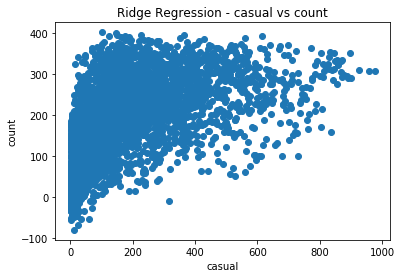

In [103]:
y_pred = ridge.predict(X1_test)

plt.scatter(y1_test, y_pred)
plt.xlabel("casual")
plt.ylabel("count")
plt.title("Ridge Regression - casual vs count")

Below I am calculating the rmse to check my error rate by using np.sqrt function which returns the non-negative square-root of an array, element-wise.

In [104]:
rmse = np.sqrt(metrics.mean_squared_error(y1_test, y_pred))
rmse

154.2552927716933

##### Cross validating the model by using the KFold validation.
In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

In [105]:
# RMSE using 5-fold cross-validation
kf = KFold(n_splits=5)
#kf.get_n_splits(X1)
scores = []
for train_index, test_index in kf.split(X1, y1):
    X_train_CV, X_test_CV = X1.iloc[train_index], X1.iloc[test_index]
    y_train_CV, y_test_CV = y1.iloc[train_index], y1.iloc[test_index]
    linearModel_1.fit(X_train_CV, y_train_CV)
    scores.append(np.sqrt(metrics.mean_squared_error(y_test_CV, linearModel_1.predict(X_test_CV))))
scores

[109.5005060710426,
 161.30827090642865,
 126.02226746304696,
 197.36906727958285,
 209.6243711690084]

We are calculating the mean value of the scores.

In [108]:
np.mean(scores)

160.76489657782187

Below we are defining some alias for the variables and printing the method name,RMSE on no CV training and RMSE ON 5-fold CV.

In [100]:
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 5-fold CV: %.3f' %cv)

We are using the above np.mean(scores) function and displaying the method.

In [101]:
show_stats('Ridge Regression',rmse ,np.mean(scores))

Method: Ridge Regression
RMSE on no CV training: 154.255
RMSE on 5-fold CV: 160.765


# CONCLUSION

n this assignment, apart from just basic visualization of data and some preprocessing the data , I have learned about Linear Model of the Supervised Learning and how the Linear Model works to obtain best fitting line for our dataset. We have discussed and implemented important algorithms **Least Squares** to obtain best fit line for our model. Apart from just implementinng these algorithm, I learned much more about the preprocessing of our data like I have used QQ plot to check the **normality** of the data in our dataset, so that all our feature values will be on same scale to get good prediction model,calculated the multi-colinearity using tolerance and VIF.

As far as the algorithms is concerned, It revolves around Error function, calculated by taking the Euclidean distance between predicted and actual value.Algorithm calculates the best possible weights which when dot product with feature matrix gives us the predicted values. But the approach followed is different. *Least Square* takes and process the data in one go. We created the 3 models for the linear regression ans checked whether my dataset is fit for the linear regression by checking the p values, AIC,BIC and R-squared and found that my second model is best fit for the linear regression.Secondly I generated the 3 models for the logistic regression and by checking the z-value and p-value and calculating the values for the AUC, we visualised that my model 3 is best fit for it.Thirdly we did step-wise regression in which we did backward step-wise regressiona and validated by checking the r-squared.Performed the interaction effect in which we checked the interaction between the columns and add the new column.Lastly, performed the regularization we performed ridge regression by taking the value of alpha as 0.5 and cross validating it by using KFold cross validation method.

First of all we read the data and try to visualize the data without applying any algorithm. Then, preprocess the data- checks the correlation between the attributes, handling the missing value, and checked the normalization of the data to  scale all the attributes to get better prediction value. We then split our datasets into training and test sets. We feed our algorithm with training sets and further analyze its prediction on test set with actual values. For the accuracy we calculated Root Mean Sqaure values  to check how accurate our model is (Lesser the value, better our model). Finally, we plot the predicted value with actual value and observed how much is the difference between our actual and predicted values.

We applied our algorithm on the complete dataset we get, but further when try to improve our model with removing some less important column from our dataset, we observe deviation from the model we get on complete dataset. Both the regression shows positive response.So to obtain best model, we have to take care of each part like preprocess the data completely, understand the importance of each attribute with our target attribute. Filter out the data which can affect our data and keep the necessary attributes.

# CONTRIBUTION


We did the assignment independently.We used the distplot,heapmap,pairplot,qqplot and i described all the functions with their uses and explained them. 

So,I contributed
By Own: 60%                                  

By External source: 15%

Provided by the professor : 25%

# CITATIONS

https://pandas.pydata.org/pandas-docs/stable/reference/

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/

https://seaborn.pydata.org/api.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

https://scikit-learn.org/stable/modules/impute.html

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/

https://www.mathworks.com/help/stats/linearmodel.fit.html

https://medium.freecodecamp.org/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b

http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients

https://www.statisticssolutions.com/multicollinearity/

http://www.researchconsultation.com/multicollinearity-regression-spss-collinearity-diagnostics-vif.asp

https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9

# LICENSE

Copyright 2019 Newzy Sharma 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the "Software"), to deal in the Software without restriction, including without limitation the 
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the 
Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE 
WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR 
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR 
OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.